## Imports

In [1]:
# Programme pour générer des fragments à partir d'une fresque. 

import cv2
import numpy as np
import pathlib
from random import randint
from IPython.display import display, clear_output
import matplotlib
%matplotlib notebook
from matplotlib import pyplot as plt

## Fonctions

In [2]:
def select_pos(taille_fresque):
    return([randint(0,taille_fresque[0]-max_height), randint(0,taille_fresque[1]-max_width)])

def decoupe(start,stop,bornes):
    keep = True
    res = [0]
    while(res[-1]+bornes[1]<stop):
        res.append(res[-1]+randint(bornes[0],bornes[1]))
    if(stop-res[-1]>2*bornes[0]):
        res.append(int((res[-1]+stop)/2))
    
    res.append(stop)
    return res

def mod_shift_colors(frag):
    """Shift the color of the img within [-alpha,+alpha],
    clip the color at the end (0-255).
    """
    
    frag = frag.astype('int16')
    for i in range(3):
        frag[:,:,i] = frag[:,:,i] + randint(-alpha,alpha)
    
    np.clip(frag,0,255,out=frag)
        
    return(frag)
    
    
    
def gen_frags_random(modifier):
    """ Function for generating the fragments to be a randomly scattered on the fresque.
    The modifier argument is a function that take a fragment as input, modify it, 
    and return a fragment (of the same size and placement). If no modifications
    are requiered, the modifier is None.
    """
    for fresque_id in range(N_fresques):
        
        # Création des dossiers
        pathlib.Path(deep_folder_filename.format(fresque_id)).mkdir(parents=True, exist_ok=True)
        
        
        fresque = cv2.imread(fresque_filename.format(fresque_id))
        #cv2.resize(fresque,(1240,900),interpolation=cv2.INTER_CUBIC)
        taille = fresque.shape

        ## GENERATING DEV
        label = 'dev'
        for i in range(N_dev):
            clear_output(wait=True)
            print("Fresque {}, fragment {}/{}, {:.3}%".format(fresque_id,i,N_dev,i/(N_dev)*100))

            # Selection de la position
            pos = select_pos(taille)
            if v:print("position: {}".format(pos))

            # Selection de la taille
            height,width = frag_size,frag_size
            if v:print("taille: {}".format((height,width)))

            # Selectionne le fragment
            frag = fresque[pos[0]:pos[0]+height,pos[1]:pos[1]+width]
            
            if modifier != None:
                    frag = modifier(frag)

            # Ecriture du frag
            if commit:
                cv2.imwrite(fragment_filename.format(fresque_id,label,i),frag)

                # Ecriture de la verité terrain
                with open(vt_filename.format(fresque_id,label,i),'w+') as f:
                    f.write("{}\n{}\n{}\n{}\n".format(int(taille[0]),
                                                    int(taille[1]),
                                                    int((pos[0]+height/2)),
                                                    int((pos[1]+width/2))))

                    f.close()

            if v:
                print("{}\n{}\n{}\n{}\n".format(int(taille[0]),
                                                int(taille[1]),
                                                int((pos[0]+height/2)),
                                                int((pos[1]+width/2))))
                
        ## GENERATING BENCH
        label = 'bench'
        for i in range(N_bench):
            clear_output(wait=True)
            print("Fresque {}, fragment {}/{}, {:.3}%".format(fresque_id,i,N_bench,i/(N_bench)*100))
            
            # Selection de la position
            pos = select_pos(taille)
            if v:print("position: {}".format(pos))
            
            # Selection de la taille
            height = randint(min_height,max_height)
            width = randint(min_width,max_width)
            if v:print("taille: {}".format((height,width)))
            
            # Selectionne le fragment
            frag = fresque[pos[0]:pos[0]+height,pos[1]:pos[1]+width]
            
            if modifier != None:
                    frag = modifier(frag)

            if commit:
                # Ecriture du frag
                cv2.imwrite(fragment_filename.format(fresque_id,label,i),frag)

                # Ecriture de la verité terrain
                with open(vt_filename.format(fresque_id,label,i),'w+') as f:
                    f.write("{}\n{}\n{}\n{}\n".format(int(taille[0]),
                                                    int(taille[1]),
                                                    int((pos[0]+height/2)),
                                                    int((pos[1]+width/2))))
                    f.close()

            if v:
                print("{}\n{}\n{}\n{}\n".format(int(taille[0]),
                                                int(taille[1]),
                                                int((pos[0]+height/2)),
                                                int((pos[1]+width/2))))

    
def gen_frags_complet(modifier):
    """ Function for generating the fragments to be a complet pavement of the fresque.
    The modifier argument is a function that take a fragment as input, modify it, 
    and return a fragment (of the same size and placement). If no modifications
    are requiered, the modifier is None.
    """
    for fresque_id in range(N_fresques):
        # Création des dossiers
        pathlib.Path(deep_folder_filename.format(fresque_id)).mkdir(parents=True, exist_ok=True)

        fresque = cv2.imread(fresque_filename.format(fresque_id))
        #cv2.resize(fresque,(1240,900),interpolation=cv2.INTER_CUBIC)
        taille = fresque.shape

        hs = decoupe(0,taille[0],(10,100))
        ws = decoupe(0,taille[1],(10,100))

        frag_count = 0    
        for i in range(len(hs)-1):
            for j in range(len(ws)-1):

                clear_output(wait=True)
                print("Fresque {}, fragment {}/{}, {:.3}%".format(fresque_id,frag_count,len(hs)*len(ws),frag_count/(len(hs)*len(ws))*100))
                frag = fresque[hs[i]:hs[i+1],ws[j]:ws[j+1],:]
                
                if modifier != None:
                    frag = modifier(frag)

                cv2.imwrite(fragment_filename.format(fresque_id,'bench',frag_count),frag)

                with open(vt_filename.format(fresque_id,'bench',frag_count),'w+') as f:
                    f.write("{}\n{}\n{}\n{}\n".format(int(taille[0]),
                                                    int(taille[1]),
                                                    int(hs[i]+(hs[i+1]-hs[i])/2),
                                                    int(ws[j]+(ws[j+1]-ws[j])/2)))
                    f.close()

                frag_count+=1

## Variables

In [4]:
base_dir                 = './training_data_shift_color_16/'
fresque_filename         = base_dir+'fresque{}.ppm'
fresque_filename_wild    = base_dir+'fresque*.ppm'
fragment_filename        = base_dir+'fragments/fresque{}/frag_{}_{:05}.ppm'
fragments_filename_wild  = base_dir+'fragments/fresque{}/frag_{}_*.ppm'
vt_filename              = base_dir+'fragments/fresque{}/vt/frag_{}_{:05}_vt.txt'
deep_folder_filename     = base_dir+'fragments/fresque{}/vt/'

v = True # Verbose
commit = True
    
# Nombre de fresques
N_fresques = 6

# Taille des fragments de bench
min_height, max_height = 16,100
min_width, max_width = 16,100

# Taille des fragments de test
frag_size = 16

# Nombre de fragments
N_bench = 200
N_dev = 3000

alpha = 30 # Range pour le shift de couleur

## Main

In [5]:
gen_frags_random(mod_shift_colors)

Fresque 5, fragment 199/200, 99.5%
position: [573, 227]
taille: (91, 90)
1000
1000
618
272



In [ ]:
## Script annexes

<IPython.core.display.Javascript object>


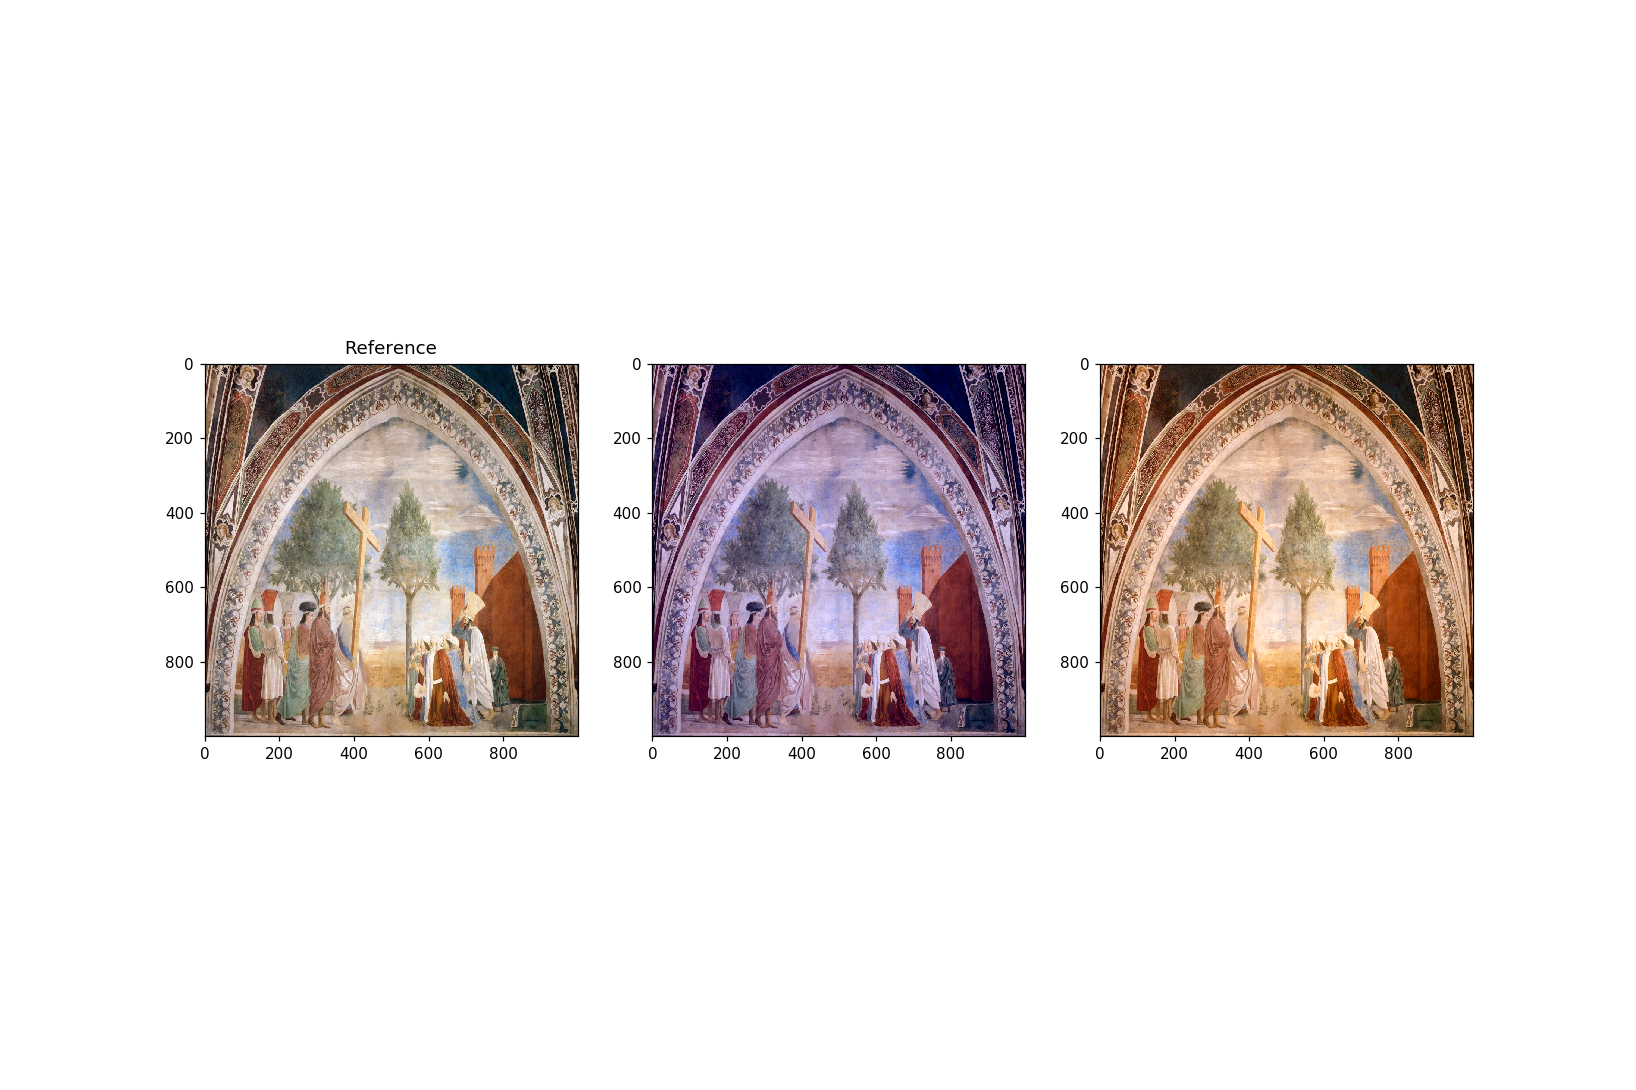

In [116]:
## Script pour voir l'impact du changement de couleur sur les images.

#frag = cv2.imread('./training_data_small/fragments/fresque4/frag_bench_00003.ppm')
frag = cv2.imread('./training_data_small/fresque_small4.ppm')
frag = cv2.cvtColor(frag, cv2.COLOR_BGR2RGB)

fig,axs = plt.subplots(1,3,figsize=(15,10))

for i,ax in enumerate(axs):
    
    if i>0:
        tmp_frag = mod_shift_colors(frag)
        ax.imshow(tmp_frag)
    else:
        ax.imshow(frag)
        ax.set_title("Reference")

plt.show()